In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

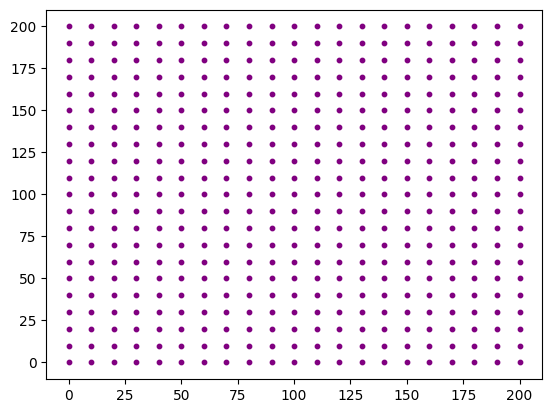

In [7]:
grid_size = 200 # Defining matrix of cations
vel = np.array([np.random.randint(1.0), np.random.randint(1.0)]) # velocity of electron
acc = np.array([0, np.random.randint(5.0)]) # acceleration of electron

x, y = np.meshgrid(np.arange(0, grid_size+1, 10), np.arange(0, grid_size+1, 10))
plt.scatter(x, y, color='purple', s=10)

In [8]:
positions = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)

def get_distances(pos):
    distances = []
    xdiffs = []
    ydiffs = []
    for i in positions:
        x_diff = pos[0] - i[0]
        y_diff = pos[1] - i[1]
        xdiffs.append(x_diff)
        ydiffs.append(y_diff)
        distances.append(np.sqrt(x_diff**2 + y_diff**2))
    return [distances, xdiffs, ydiffs]

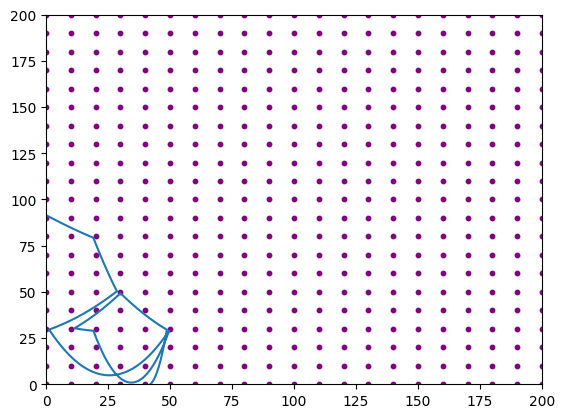

In [17]:
ini_x = np.random.randint(grid_size)

while ini_x%10==0:
    ini_x = np.random.randint(grid_size)

current_pos = np.array([ini_x,0])

poss = [current_pos]

r = 1.5

while (current_pos[1] <= grid_size and current_pos[1] >= 0) and (current_pos[0] <= grid_size and current_pos[0] >= 0):
    d = get_distances(current_pos)
    if any(t < r for t in d[0]):
        index = [i for i in range(len(d[0])) if d[0][i] < r][0]
        x_diff = d[1][index]
        y_diff = d[2][index]
        diff = np.array([x_diff, y_diff])
        vel = vel - 2 * ((np.dot(vel, diff))/(x_diff**2+y_diff**2)) * diff
    else:
        vel = vel + acc * 0.1
    current_pos = current_pos + vel*0.1
    poss.append(current_pos)

poss = np.array(poss)

fig, ax = plt.subplots()
plt.xlim([0, grid_size])
plt.ylim([0, grid_size])

line, = ax.plot(poss[:,0], poss[:,1])
plt.scatter(x, y, color='purple', s=10)

def update(num, X, Y, line):
    line.set_data(X[:num], Y[:num])
    return line,

ani = animation.FuncAnimation(fig, update, len(poss[:,0]), interval=100, fargs=[poss[:,0], poss[:,1], line], blit=True)
writervideo = animation.FFMpegWriter(fps=120) 
ani.save("./ani.mp4", writer=writervideo)
